<a href="https://colab.research.google.com/github/MYoussef885/Gold_Price_Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [2]:
path = r'C:\Users\User\dev\training_model\dataset\modified_financial_data.csv'
gold_data = pd.read_csv(path)

In [3]:
# print first five rows in the dataframe
gold_data.head()

,^GSPC,GLD,USO,SLV,EURUSD=X,Date
0,2058.199951,114.080002,159.119995,15.11,1.208941,2015-01-02
1,2020.579956,115.800003,150.320007,15.50,1.194643,2015-01-05
2,2002.609985,117.120003,144.399994,15.83,1.193902,2015-01-06
3,2025.900024,116.430000,146.960007,15.85,1.187536,2015-01-07
4,2062.139893,115.940002,148.399994,15.64,1.183600,2015-01-08


In [4]:
# print the last five rows of the dataframe
gold_data.tail()

,^GSPC,GLD,USO,SLV,EURUSD=X,Date
2508,6040.040039,241.440002,73.650002,27.020000,1.040583,2024-12-24
2509,6037.589844,243.070007,73.129997,27.139999,1.039955,2024-12-26
2510,5970.839844,241.399994,73.849998,26.760000,1.042318,2024-12-27
2511,5906.939941,240.630005,74.820000,26.430000,1.042938,2024-12-30
2512,5881.629883,242.130005,75.550003,26.330000,1.040615,2024-12-31


In [5]:
gold_data.rename(columns={'^GSPC': 'SPX'}, inplace=True)
gold_data.rename(columns={'EURUSD=X': 'EUR/USD'}, inplace=True)

In [6]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD,Date
0,2058.199951,114.080002,159.119995,15.11,1.208941,2015-01-02
1,2020.579956,115.800003,150.320007,15.50,1.194643,2015-01-05
2,2002.609985,117.120003,144.399994,15.83,1.193902,2015-01-06
3,2025.900024,116.430000,146.960007,15.85,1.187536,2015-01-07
4,2062.139893,115.940002,148.399994,15.64,1.183600,2015-01-08


In [7]:
# number of rows and columns
gold_data.shape

(2513, 6)

In [8]:
# getting some information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2513 non-null   float64
 1   GLD      2513 non-null   float64
 2   USO      2513 non-null   float64
 3   SLV      2513 non-null   float64
 4   EUR/USD  2513 non-null   float64
 5   Date     2513 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.9+ KB


In [9]:
# checking number of missing values
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
Date       0
dtype: int64

In [10]:
# statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,3357.000800,150.670633,80.727867,18.722817,1.119123
std,1084.231550,35.249878,28.420000,4.190341,0.052293
min,1829.079956,100.500000,17.040001,11.210000,0.959619
25%,2432.459961,120.129997,67.500000,15.450000,1.084481
50%,3005.699951,144.190002,79.389999,16.980000,1.114964
75%,4205.450195,175.039993,94.239998,21.990000,1.156363
max,6090.270020,257.500000,166.559998,31.740000,1.251001


Correlation:
1. Positive Correlation
2. Negative Correlation

In [11]:
correlation = gold_data.corr

In [12]:
# constructing a heatmap tp understand the correlation
#plt.figure(figsize = (8,8))
#sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap ='Blues')

In [13]:
# correlation values of GLD
#print(correlation['GLD'])

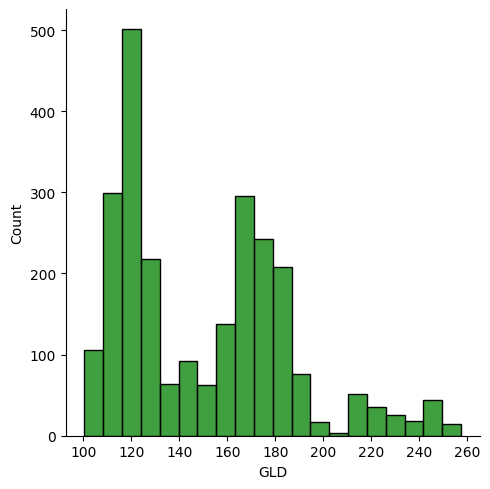

In [14]:
# checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color='green')

Splitting the features and target

In [15]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [16]:
print(X)

              SPX         USO        SLV   EUR/USD
0     2058.199951  159.119995  15.110000  1.208941
1     2020.579956  150.320007  15.500000  1.194643
2     2002.609985  144.399994  15.830000  1.193902
3     2025.900024  146.960007  15.850000  1.187536
4     2062.139893  148.399994  15.640000  1.183600
...           ...         ...        ...       ...
2508  6040.040039   73.650002  27.020000  1.040583
2509  6037.589844   73.129997  27.139999  1.039955
2510  5970.839844   73.849998  26.760000  1.042318
2511  5906.939941   74.820000  26.430000  1.042938
2512  5881.629883   75.550003  26.330000  1.040615

[2513 rows x 4 columns]


In [17]:
print(Y)

0       114.080002
1       115.800003
2       117.120003
3       116.430000
4       115.940002
           ...    
2508    241.440002
2509    243.070007
2510    241.399994
2511    240.630005
2512    242.130005
Name: GLD, Length: 2513, dtype: float64


Splitting into Training and Test Data

In [18]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
#--- dividing with shuffle=True, should be shuffle=False

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2, shuffle=False)

Model Training:
Random Forest Regressor

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
# training the model
regressor.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.50680145 168.52500214 167.38299698 165.96309799 167.38799774
 166.98479782 166.5912999  167.11480042 167.8870015  170.01050186
 169.33810272 167.39930069 168.45170181 169.66800217 168.21099991
 167.70119949 168.69580261 169.30230209 167.83709946 167.33240005
 168.30579971 169.63320282 170.8527005  165.27159882 164.98419876
 165.89589966 165.19979919 164.30149933 164.78669907 165.17139923
 164.93699936 164.9860994  164.0759993  163.91539993 163.83839951
 163.84549866 163.52779892 163.44579803 163.44259796 163.24439804
 163.27939835 163.4823967  163.77549896 164.78619766 163.4443985
 163.37849899 163.28359848 163.27969864 163.55249817 164.10619843
 164.05379868 164.01239853 165.01529907 165.50780075 164.64909897
 166.26560135 166.25159973 166.27850082 166.10349991 166.14349762
 166.1086972  167.64509995 169.53780197 170.13510239 170.73530075
 170.3203006  170.81150085 170.74360092 171.44050049 175.86990082
 174.6522995  172.98839996 173.81809937 174.01119934 173.63239929
 170.996701

In [23]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error:', error_score)

R squared error: -0.582862329264771


Compare the actual values and predicted values in a plot

In [24]:
Y_test = list(Y_test)

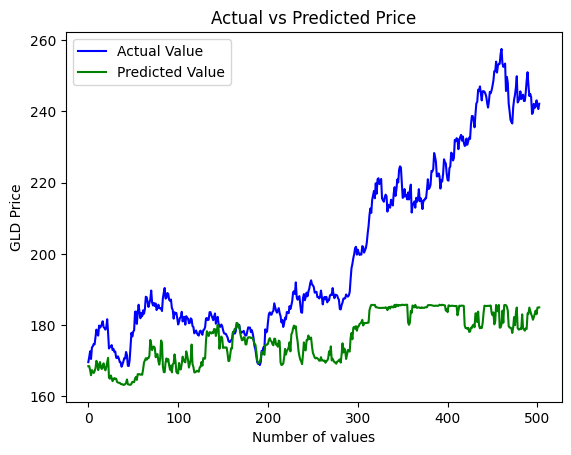

In [25]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()